In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [2]:
np.random.seed(42)

In [3]:
# multivariate distribution for Height [cm], Weight[kg], Shoe size[?]
male_sample = np.random.multivariate_normal(
    mean = [170.0, 75, 41.],
    cov=[[30., 70., 1.],
        [70., 50., 12.],
        [1., 12., 1.]],
    size= 100000
)
df = pd.DataFrame(male_sample, columns=['height', 'weight', 'shoe_size'])
df.loc[:,'model'] = 'normal'
# df.shoe_size = df.shoe_size.astype(int)

/Users/ivannedjalkov/opt/anaconda3/envs/gcp/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

covariance is not positive-semidefinite.



In [4]:
df.describe()

,height,weight,shoe_size
count,100000.000000,100000.000000,100000.000000
mean,170.006450,75.002410,41.003565
std,8.026558,8.783627,1.984230
min,133.234215,35.170441,32.228404
25%,164.630021,69.046792,39.665527
50%,170.006452,74.989635,40.993475
75%,175.414703,80.920375,42.338932
max,207.151107,111.794472,50.029424


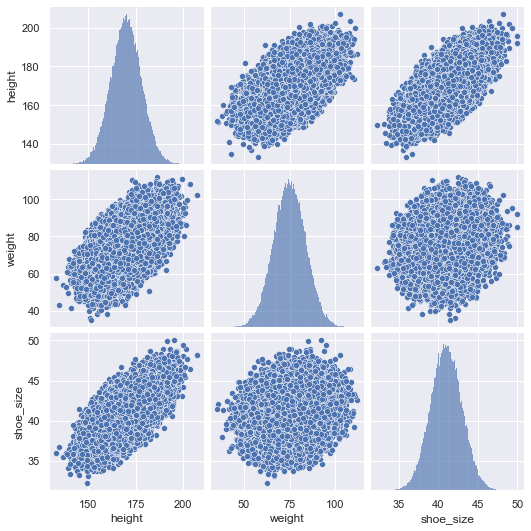

In [5]:
sns.pairplot(df)

In [6]:
# multivariate distribution for Height [cm], Weight[kg], Shoe size[?]
np.random.seed(12)
anomaly_sample = np.random.multivariate_normal(
    mean = [170.0, 75, 41.],
    cov=[[30., -70., -7.],
        [-70., 50., 12.],
        [-7., 12., 5]],
    size= 100
)
anomaly_df = pd.DataFrame(anomaly_sample, columns=['height', 'weight', 'shoe_size'])
anomaly_df.loc[:,'model'] = 'anomaly'
anomaly_df.describe()


/Users/ivannedjalkov/opt/anaconda3/envs/gcp/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning:

covariance is not positive-semidefinite.



,height,weight,shoe_size
count,100.000000,100.000000,100.000000
mean,168.812787,74.569760,40.538654
std,8.279294,8.895945,2.413119
min,146.873955,51.877924,35.592617
25%,163.840014,68.829042,39.038923
50%,169.157030,74.421220,40.536368
75%,174.568556,81.313808,41.897557
max,193.922953,96.797524,48.095001


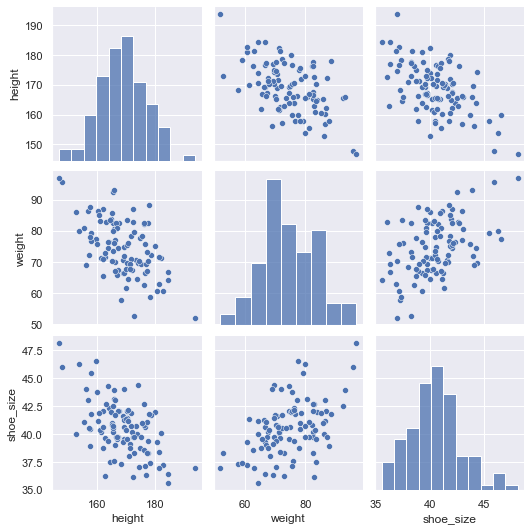

In [7]:
sns.pairplot(anomaly_df)

## Combine the 2 datasets

In [8]:
df_all = pd.concat([df,anomaly_df])
df_all.shoe_size = df_all.shoe_size.astype(int)
df_all = df_all.reset_index().drop(columns=['index'])

In [9]:
df_all.to_parquet('../data/raw/syntetic-1.prq')

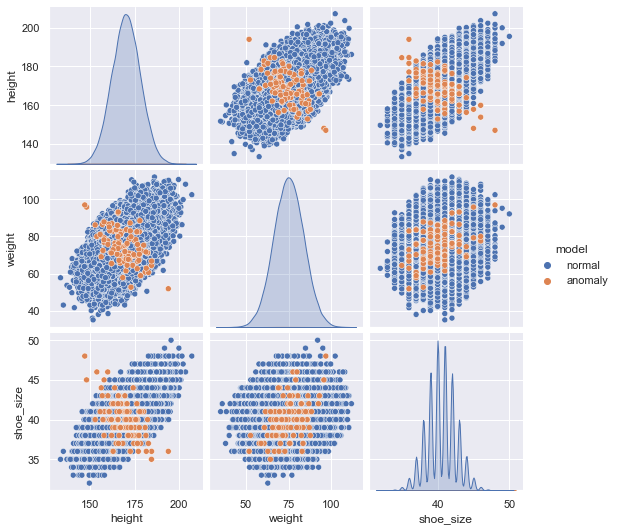

In [10]:
sns.pairplot(df_all, hue="model")

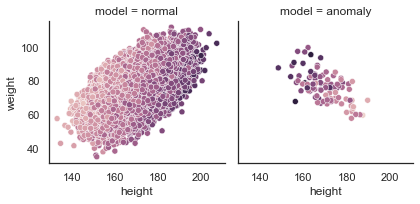

In [24]:
g = sns.FacetGrid(df_all, col="model")
g.map(sns.scatterplot, "height", 'weight', 'shoe_size')

# Shoe size

In [26]:
shoe_size_int = df.shoe_size.astype(int).astype(str).sort_values()
pd.DataFrame(shoe_size_int.value_counts().sort_index(0))

,shoe_size
32,1
33,11
34,95
35,423
36,1617
37,4320
38,9204
39,15205
40,19255
41,19027


<AxesSubplot:title={'center':'Shoe size distribution. N=100000'}, xlabel='EU shoe size', ylabel='Count'>

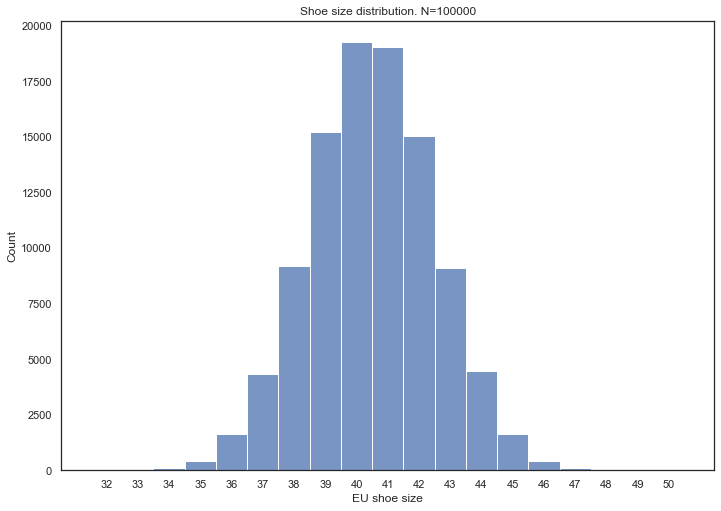

In [27]:
sns.set_theme(style="white")
sns_plot = sns.histplot(shoe_size_int,
            discrete=True)
plt.xlabel('EU shoe size')
plt.ylabel('Count')
plt.title(f'Shoe size distribution. N={df.shape[0]}')
sns_plot

In [18]:
sns_plot.figure.savefig("shoe_size_fig.png", pad_inches=0,  bbox_inches=None,)
# plt.savefig("shoe_size_fig.png")

## Height

Text(0.5, 1.0, 'People height distribution. N=100000')

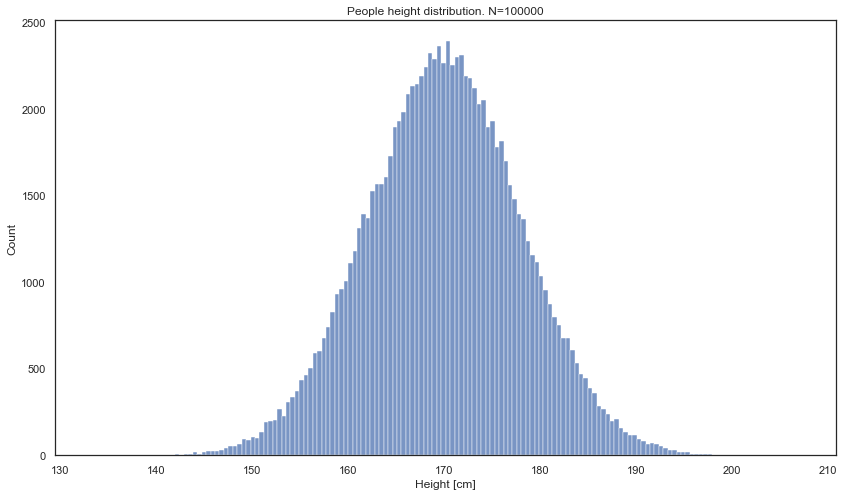

In [178]:
sns.set_theme(style="white")
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns_plot = sns.histplot(df_all, x='height')
plt.xlabel('Height [cm]')
plt.ylabel('Count')
plt.title(f'People height distribution. N={df.shape[0]}')


Text(0.5, 1.0, 'Height ~ Shoe size relationship.')

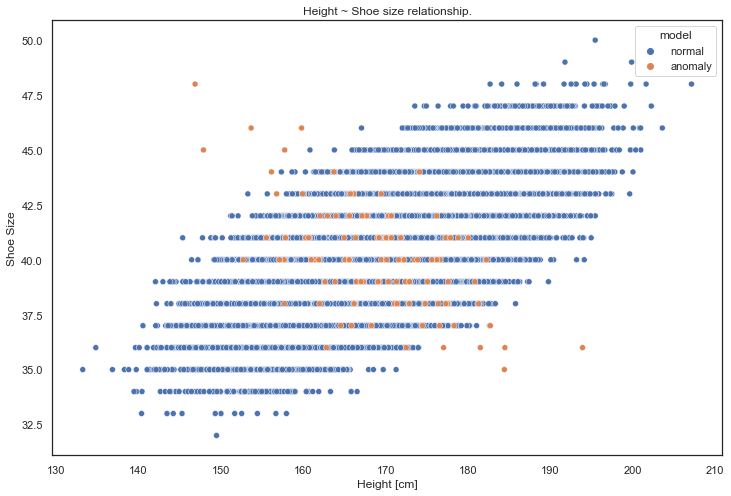

In [38]:
sns.set_theme(style="white")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns_plot = sns.scatterplot(data=df_all, x='height', y="shoe_size", ax=ax , hue="model")
plt.xlabel('Height [cm]')
plt.ylabel('Shoe Size')
plt.title(f'Height ~ Shoe size relationship.')


### Manually select outliers

In [39]:
df_all.loc[:,'outlier'] = False

In [43]:
df_all.loc[(df_all.shoe_size >= 45 ) & (df_all.height<=160),'outlier'] = True
df_all.loc[(df_all.shoe_size <=36 ) & (df_all.height>175),'outlier'] = True

In [44]:
df_all[df_all.outlier][['height','shoe_size']]

,height,shoe_size
1,184.429511,35
3,147.892567,45
4,157.755336,45
16,193.922953,36
17,159.802882,46
22,184.492899,36
24,153.678861,46
36,146.873955,48
56,177.048080,36
76,181.502107,36


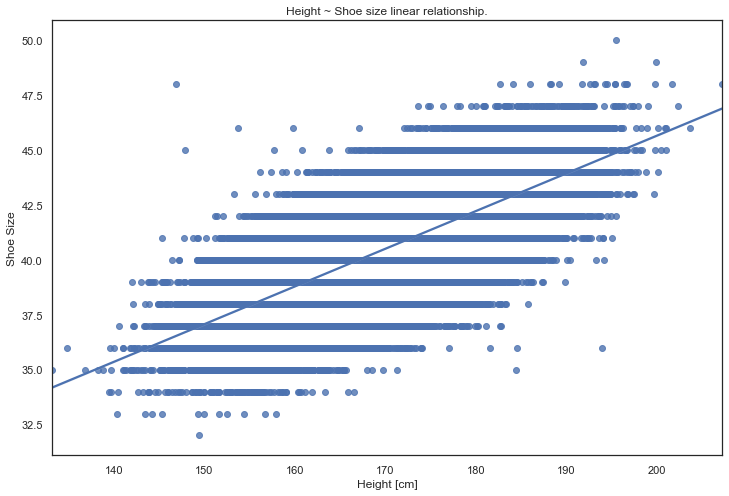

In [45]:
sns.set_theme(style="white")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns_plot = sns.regplot(data=df_all, x='height', y="shoe_size", ax=ax)
plt.xlabel('Height [cm]')
plt.ylabel('Shoe Size')
plt.title(f'Height ~ Shoe size linear relationship.')
sns_plot.figure.savefig("shoe_height_reg_model.png", pad_inches=0,  bbox_inches=None,)

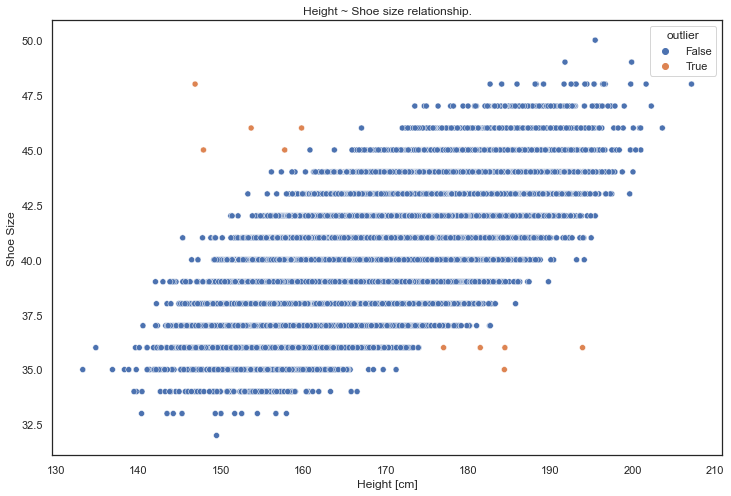

In [46]:
sns.set_theme(style="white")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns_plot = sns.scatterplot(data=df_all, x='height', y="shoe_size", hue="outlier", ax=ax)
plt.xlabel('Height [cm]')
plt.ylabel('Shoe Size')
plt.title(f'Height ~ Shoe size relationship.')

sns_plot.figure.savefig("shoe_height_outlier.png", pad_inches=0,  bbox_inches=None,)

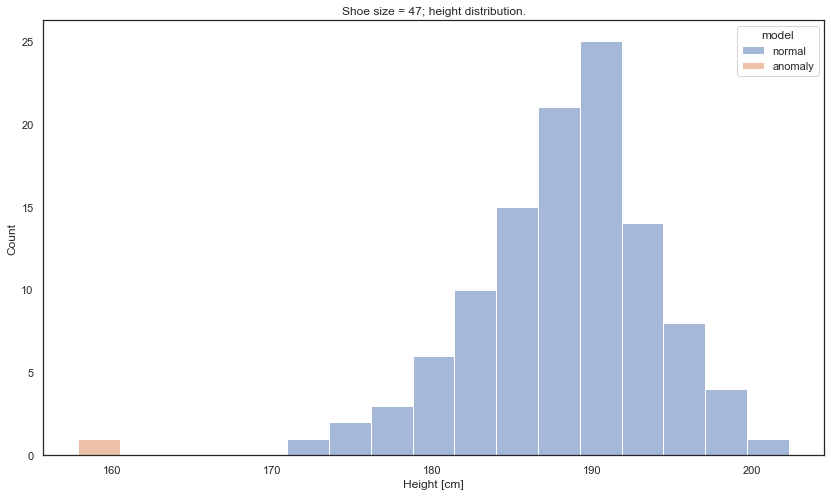

In [181]:
sns.set_theme(style="white")
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns_plot = sns.histplot(df_all[df_all.shoe_size==47], x='height', hue="model")
plt.xlabel('Height [cm]')
plt.ylabel('Count')
plt.title(f'Shoe size = 47; height distribution.')


sns_plot.figure.savefig("shoe47_anomaly.png", pad_inches=0,  bbox_inches=None,)

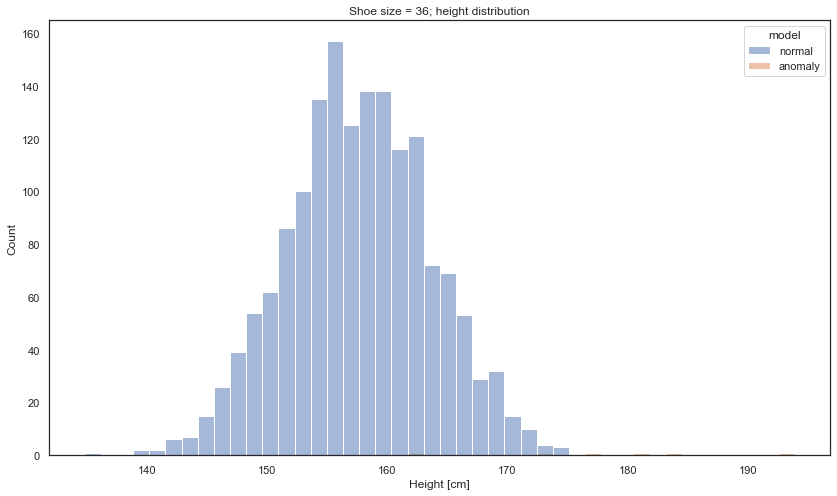

In [47]:
sns.set_theme(style="white")
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns_plot = sns.histplot(df_all[df_all.shoe_size==36], x='height', hue="model")
plt.xlabel('Height [cm]')
plt.ylabel('Count')
plt.title(f'Shoe size = 36; height distribution')

sns_plot.figure.savefig("shoe36_anomaly.png", pad_inches=0,  bbox_inches=None,)

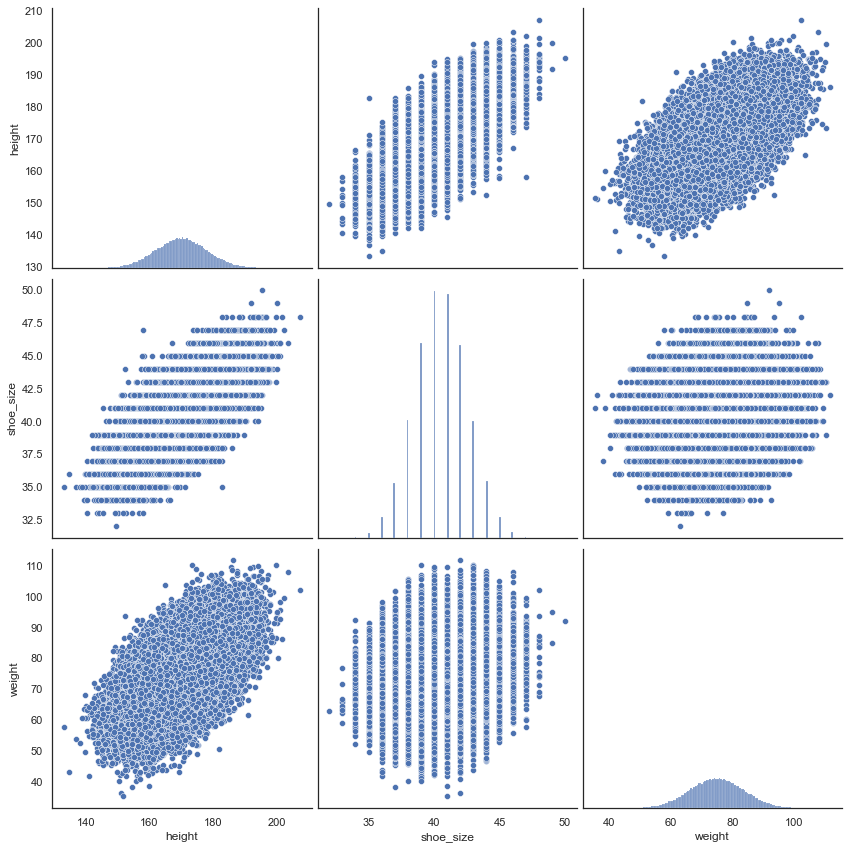

In [211]:
sns.set_theme(style="white")
sns_plot = sns.pairplot(df_all[['height', 'shoe_size', 'weight']], height=4, aspect=1)
sns_plot.savefig('pairplot.png', dpi=250,bbox_inches=None, pad_inches=0.1)

In [ ]:
sns_plot.savefig('pairplot.png', dpi=300, bbox_inches=None, pad_inches=0.1)

In [48]:
df_all.corr()

,height,weight,shoe_size,outlier
height,1.000000,0.557854,0.687053,-0.001576
weight,0.557854,1.000000,0.177890,-0.000664
shoe_size,0.687053,0.177890,1.000000,0.001978
outlier,-0.001576,-0.000664,0.001978,1.000000
